# [practice] Microsoft ML course challenge 01
## Flights Data Exploration Challenge

https://github.com/MicrosoftDocs/ml-basics/blob/ee7bccccf5dd1a95f9d547b2e9e5fd68f61fe02e/challenges/01%20-%20Flights%20Solution.ipynb

Import File from URL and view the data.

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/challenges/data/flights.csv"
df_flight = pd.read_csv(url, sep = ',', header='infer')
df_flight.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


## 1.Clean missing values

Find how many null values in each column.  
Use **sum()**  because isnull() will return Boolean value.  
Sum() will sum the 1 and 0. **count()** will just count number of rows.  

In [2]:
df_flight.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64


DepDel15 column refers to the DepDelay column.  
Departures are considered late if the delay time is 15 minutes or more:   
  **DepDelay >= 15 then DepDel15 == True**  
  
axis(1) ensures that for each row, all column satisfy the constraint.

In [3]:
df_flight[df_flight.isnull().any(axis = 1)][['DepDelay','DepDel15']]

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


Double-check if the DepDelay column is really not show delayed.

In [4]:
df_flight[df_flight.isnull().any(axis = 1)].DepDelay.describe()

count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

Let's replace the missing DepDel15 indicator with a 0 and confirm there are no more missing values.

In [5]:
df_flight.DepDel15 = df_flight.DepDel15.fillna(0)
df_flight.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

Just curious, how many flights are delayed at the departure but not at the destination.

In [6]:
import numpy as np

df_flight[np.logical_and(df_flight.DepDel15 == 1, df_flight.ArrDel15 == 0 )][['DepDel15','ArrDel15']]

,DepDel15,ArrDel15
9,1.0,0
92,1.0,0
103,1.0,0
124,1.0,0
155,1.0,0
...,...,...
271758,1.0,0
271760,1.0,0
271775,1.0,0
271808,1.0,0


## 2. Clean outliers

View the distribution and summary statistics for the **DepDelay** and **ArrDelay** columns.


DepDelay 
Minimum:-63.00
Maximum:1425.00
Mean:10.35
Median:-1.00
Mode:-3.00

ArrDelay 
Minimum:-75.00
Maximum:1440.00
Mean:6.50
Median:-3.00
Mode:0.00



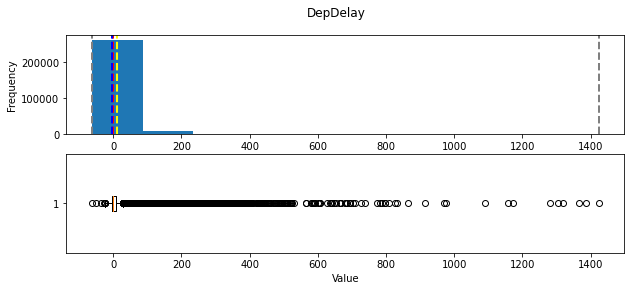

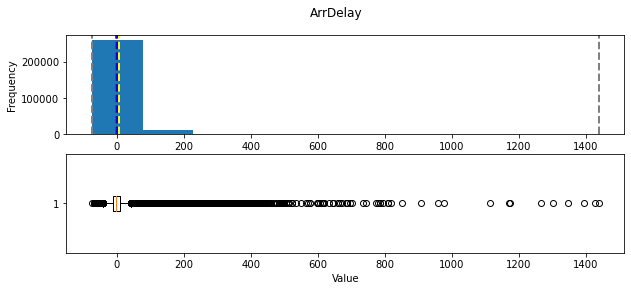

In [7]:
# Function to show summary stats and distribution for a column
%matplotlib inline
import matplotlib

# Define the function and the data column that we want to plot.

def show_col_distribution (col_data):
    from matplotlib import pyplot as plt

    # Get statistics
    
    min_val = col_data.min()
    max_val = col_data.max()
    mean_val = col_data.mean()
    med_val = col_data.median()
    mod_val = col_data.mode()[0]
    
    print(col_data.name,"\nMinimum:{:.2f}\nMaximum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\n".format(min_val,
                                                                                                            max_val,
                                                                                                            mean_val,
                                                                                                            med_val,
                                                                                                            mod_val)
    )
    
    # Create a figure for 2 subplots (2 rows, 1 column)
    
    fig, ax = plt.subplots(2,  1, figsize = (10,4))
    
    ax[0].hist(col_data)
    ax[0].set_ylabel('Frequency')
    
    # Add lines for the mean, median, and mode
    
    ax[0].axvline(min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(max_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(mean_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(mod_val, color = 'blue', linestyle='dashed', linewidth = 2)
    
    # Plot the boxplot
    
    ax[1].boxplot(col_data, vert=False)
    ax[1].set_xlabel('Value')
    
    # Add a title to the Figure
    fig.suptitle(col_data.name)
    
    
# Call the function for each delay field
Target_Fields = ['DepDelay','ArrDelay']

for col in Target_Fields:
    show_col_distribution(df_flight[col])
    

There are a outliers at the lower and upper ends of both variables - particularly at the upper end.

In [8]:
# Trim outliers for ArrDelay and DepDelay based on 1% and 90% percentiles

Arr01_pertile = df_flight.ArrDelay.quantile(0.01)
Arr90_pertile = df_flight.ArrDelay.quantile(0.90)

print("New ArrDelay value between {:.2f} and {:.2f}" .format(Arr01_pertile,Arr90_pertile))

Dep01_pcntile = df_flight.DepDelay.quantile(0.01)
Dep90_pcntile = df_flight.DepDelay.quantile(0.90)

print("New DepDelay value between {:.2f} and {:.2f}" .format(Dep01_pcntile,Dep90_pcntile))

                                                                                                                                                                                                                         

New ArrDelay value between -33.00 and 38.00
New DepDelay value between -12.00 and 37.00


In [9]:
# Filter a new Dataframe called New_flights by percentiles.

New_flights = df_flight[np.logical_and(df_flight.ArrDelay > Arr01_pertile, \
                                         df_flight.ArrDelay < Arr90_pertile )]

New_flights = New_flights[np.logical_and(New_flights.DepDelay > Dep01_pcntile, \
                                    New_flights.DepDelay < Dep90_pcntile )]

# df_filtered = df[(df['column']>=100) & (df['column']<=150)]

DepDelay 
Minimum:-11.00
Maximum:36.00
Mean:1.29
Median:-1.00
Mode:-3.00

ArrDelay 
Minimum:-32.00
Maximum:37.00
Mean:-3.10
Median:-5.00
Mode:0.00



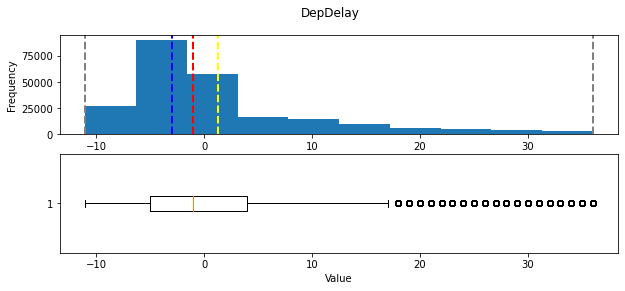

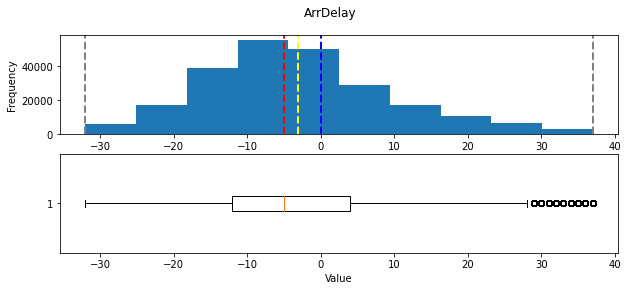

In [10]:
# View the revised distributions
# Already defined Target_Fields before = ['DepDelay','ArrDelay']

for col in Target_Fields:
    show_col_distribution(New_flights[col])

## Distribution plots - Empirical cumulative distribution function (ECDF)
### An ECDF represents the proportion or count of observations falling below each unique value in a dataset.


[-32 -32 -32 ...  37  37  37]
[4.25890751e-06 8.51781501e-06 1.27767225e-05 ... 9.99991482e-01
 9.99995741e-01 1.00000000e+00]


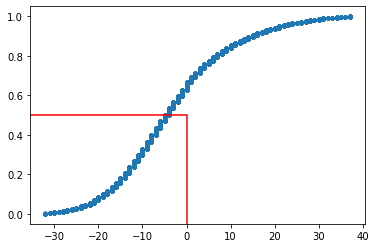

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

def ecdf(data):

    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x  / sort/order the data point
    x = np.sort(data)
    # y-data for the ECDF: y / give the x data point a position showing by percentage (0.0 ~ 1.0)
    y = np.arange(1, n+1) / n
    
    return x , y

# Compute ECDF plot for one-dimensional arrayi: ArrDelay column

x_val, y_val = ecdf(New_flights['ArrDelay'])
print(x_val)  
print(y_val)

plt.plot(x_val, y_val, marker='.', linestyle='none')

## Use line to indicate the proximate 50% percentile = not delayed(<=0) on an ECDF
plt.axvline(x=0, ymin=0.0, ymax=0.5, color ='r')
plt.axhline(y=0.5, xmax= 35/75, color = 'r')
plt.show()

### Use seaborn plot ECDF

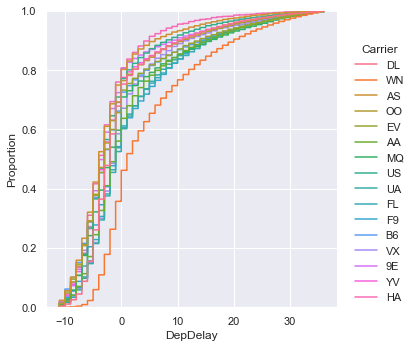

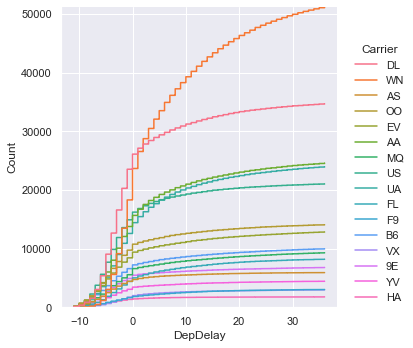

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.displot(New_flights, x="DepDelay", hue="Carrier", kind="ecdf")
sns.displot(New_flights, x="DepDelay", hue="Carrier", kind="ecdf", stat="count")

plt.show()

A downside is that the relationship between the appearance of the plot and the basic properties of the distribution (such as its central tendency, variance, and the presence of any bimodality) may not be as intuitive.

## 3. Explore the data

### Q1. What are the average (mean) departure and arrival delays?

In [13]:
New_flights[['DepDelay','ArrDelay']].mean()    # This Data perform the result not include outliers.

DepDelay    1.288417
ArrDelay   -3.103666
dtype: float64

In [14]:
New_flights.describe()     # This Data perform the result not include outliers.

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,234802.0,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000
mean,2013.0,7.012951,15.810819,3.902309,12751.998284,12735.984404,1297.782046,1.288417,0.103445,1479.238690,-3.103666,0.116243,0.012155
std,0.0,1.999885,8.838329,1.993400,1508.571872,1506.084054,469.718843,9.153171,0.304539,488.477765,12.946277,0.320516,0.109578
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,900.000000,-5.000000,0.000000,1105.000000,-12.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1255.000000,-1.000000,0.000000,1500.000000,-5.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1705.000000,4.000000,0.000000,1900.000000,4.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,36.000000,1.000000,2359.000000,37.000000,1.000000,1.000000


### Q2. How do the carriers compare in terms of arrival and departure delay performance?
Now let's see how each carrier performed. Use carrier as a categorical variable.

Here we use the sns.boxenplot.  
**Boxenplots (actually called letter-value plots in the original paper and in the lvplot R package) show the distribution differently and are better for bigger datasets. Classic boxplots can have too many outliers and don't show as much information about the distribution.  
Letter-value plots (boxenplots) start with the median (Q2, 50th percentile) as the centerline. Each successive level outward contains half of the remaining data. So the first two sections out from the centerline contain 50% of the data. After that, the next two sections contain 25% of the data. This continues until we are at the outlier level. Each level out is shaded lighter. There are 4 methods for calculating outliers (described in the paper and available in seaborn). The default is to end up with around 5-8 outliers in each tail.**

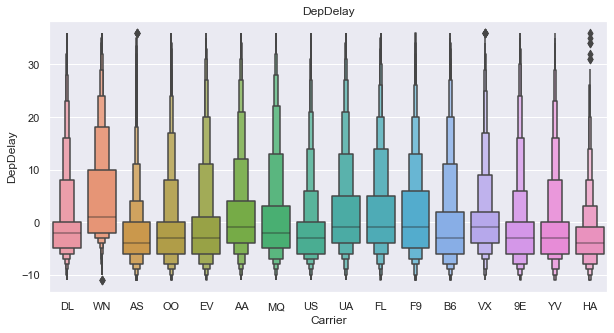

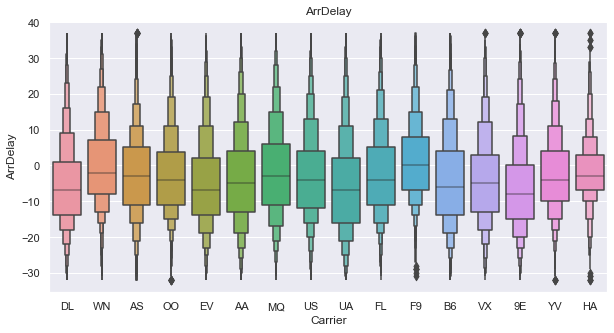

In [15]:
for col in Target_Fields:
    plt.figure(figsize=(10,5))
    sns.boxenplot(x = 'Carrier', y = col,  data = New_flights).set_title(col)

### Q3. Are some days of the week more prone to arrival days than others?
See if there is a noticeable difference in the different time categories.

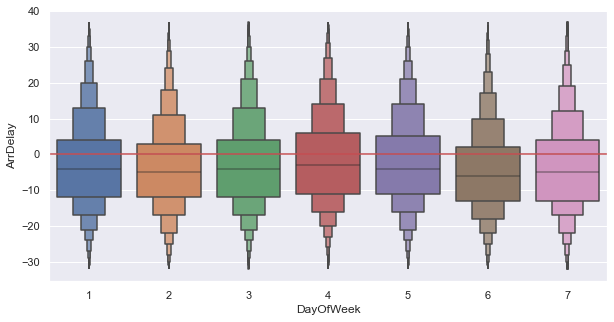

In [16]:
plt.figure(figsize=(10,5))
sns.boxenplot(x = 'DayOfWeek', y = 'ArrDelay', data = New_flights)
plt.axhline(y = 0, c = 'r')
plt.show()

### Q4.Which departure airport has the highest average departure delay?
 1. Group DataFrame by OriginAirportName column
 2. Calculating mean values based on OriginAirportName Group
 3. Order DataFrame by mean value

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


<AxesSubplot:xlabel='OriginAirportName'>

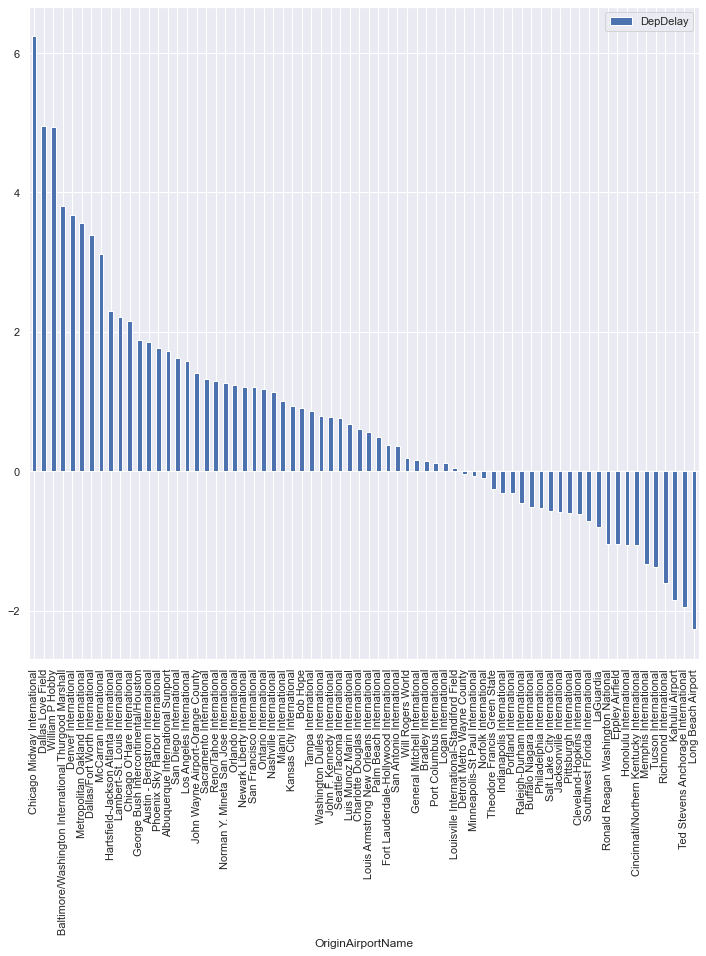

In [17]:
Dep_airport_group = New_flights.groupby(New_flights.OriginAirportName)
print(type(Dep_airport_group))

Mean_dep_delay = pd.DataFrame(Dep_airport_group['DepDelay'].mean()).sort_values('DepDelay', ascending = False)
Mean_dep_delay

# Method 1 - use .plot directly
Mean_dep_delay.plot( kind = "bar", figsize=(12,12))

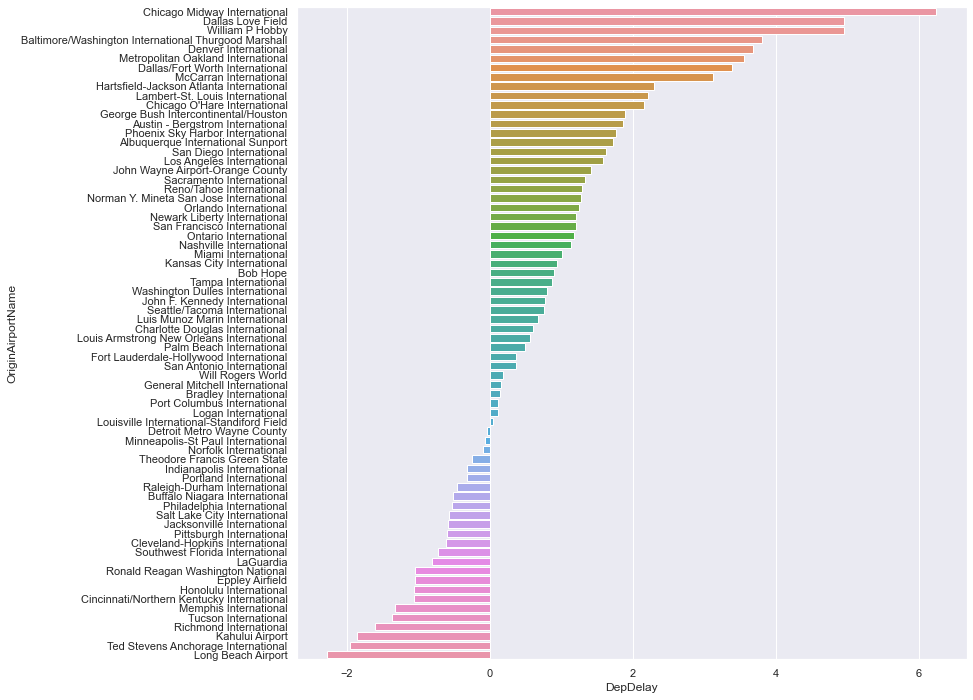

In [18]:
# Method 2 - use seaborn barplot
Mean_dep_delay['OriginAirportName'] = Mean_dep_delay.index
plt.figure(figsize=(12,12))
sns.barplot(x = "DepDelay",  y = "OriginAirportName", data = Mean_dep_delay)
plt.show()

### Q5. Do late departures tend to result in longer arrival delays than on-time departures?

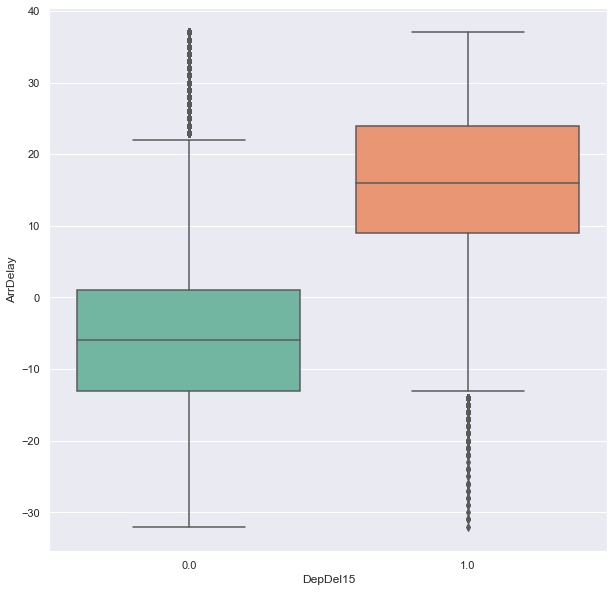

In [19]:
plt.figure(figsize=(10,10))
sns.boxplot(x = "DepDel15", y = "ArrDelay", data = New_flights, palette = "Set2")
plt.show()

### Q6. Which route (from origin airport to destination airport) has the most late arrivals?

In [20]:
# Add a new column name route, form OriginAirport to DestAirport

New_flights['Route'] = New_flights['OriginAirportName'].astype(str) + ' to '+ New_flights['DestAirportName'].astype(str)
print(New_flights.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234802 entries, 0 to 271938
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               234802 non-null  int64  
 1   Month              234802 non-null  int64  
 2   DayofMonth         234802 non-null  int64  
 3   DayOfWeek          234802 non-null  int64  
 4   Carrier            234802 non-null  object 
 5   OriginAirportID    234802 non-null  int64  
 6   OriginAirportName  234802 non-null  object 
 7   OriginCity         234802 non-null  object 
 8   OriginState        234802 non-null  object 
 9   DestAirportID      234802 non-null  int64  
 10  DestAirportName    234802 non-null  object 
 11  DestCity           234802 non-null  object 
 12  DestState          234802 non-null  object 
 13  CRSDepTime         234802 non-null  int64  
 14  DepDelay           234802 non-null  int64  
 15  DepDel15           234802 non-null  float64
 16  CR

In [21]:
# Group by routes
New_flights.groupby(['Route']).agg({'ArrDel15':sum}).sort_values('ArrDel15', ascending=False)


,ArrDel15
Route,
San Francisco International to Los Angeles International,146
Los Angeles International to San Francisco International,123
McCarran International to Los Angeles International,90
LaGuardia to Hartsfield-Jackson Atlanta International,88
Los Angeles International to McCarran International,80
...,...
Luis Munoz Marin International to Ronald Reagan Washington National,0
Luis Munoz Marin International to Jacksonville International,0
Luis Munoz Marin International to Chicago O'Hare International,0


### Q7. Which route has the highest average arrival delay?

In [22]:
New_flights.groupby(['Route']).agg({'ArrDelay':np.mean}).sort_values('ArrDelay', ascending=False)

# Aggregate different functions over the columns and rename the index of the resulting DataFrame.
# reference to: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html

,ArrDelay
Route,
Louis Armstrong New Orleans International to Ronald Reagan Washington National,25.333333
Cleveland-Hopkins International to Palm Beach International,18.000000
Denver International to Raleigh-Durham International,14.153846
Charlotte Douglas International to General Mitchell International,13.500000
Cleveland-Hopkins International to Philadelphia International,12.800000
...,...
Lambert-St. Louis International to Cleveland-Hopkins International,-20.000000
Jacksonville International to Chicago Midway International,-20.000000
Eppley Airfield to LaGuardia,-20.750000
